<a href="https://colab.research.google.com/github/mounikarevanuru/mlfoundations/blob/main/algorithms/linear_regression/linear_regression_stochastic_gradient_descent_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [58]:
from math import inf
class LinearRegressionStochasticGD:

  def __init__(self, lr = 0.01, epochs = 1000, patience = 10):
    self.lr = lr
    self.epochs = epochs
    self.coef_ = None
    self.intercept_ = None

  def _rmse_loss(self, X, y):
    y_pred = self.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))


  def fit(self, X, y):

    self.coef_ = np.ones(X.shape[1])
    self.intercept_ = 0

    for i in range(self.epochs):
      for j in range(X.shape[0]):

        idx = np.random.randint(0, X.shape[0])

        y_pred = X[idx].dot(self.coef_) + self.intercept_

        intercept_der = -2 * np.mean(y[idx] - y_pred)
        coef_der = -2 * X[idx].T.dot((y[idx] - y_pred))

        self.intercept_ = self.intercept_ - (self.lr * intercept_der)
        self.coef_ = self.coef_ - (self.lr *  coef_der)

    self.loss_ = self._rmse_loss(X, y)

  def predict(self, X):

    return X.dot(self.coef_) + self.intercept_

  def r2_score(self, X, y):

    y_pred = self.predict(X)
    ss_res = np.sum((y - y_pred) ** 2)
    ss_total = np.sum((y - np.mean(y)) ** 2)

    return 1 - ss_res/ss_total


In [59]:
diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [60]:
X = diabetes.data
y = diabetes.target

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [62]:
model = LinearRegressionStochasticGD(lr = 0.01, epochs = 2000)
model.fit(X_train, y_train)

In [63]:
y_pred = model.predict(X_test)
print("R² Score:", model.r2_score(X_test, y_test))
print("Final RMSE:", model.loss_)

R² Score: 0.45779799810190314
Final RMSE: 53.802029121264475


In [64]:
print(model.coef_)
print(model.intercept_)

[  46.69499644 -235.71034273  554.50175337  339.04732599 -284.12983511
    8.07718877 -127.55873983  184.24638531  494.63402395   52.63133604]
154.22614995851612


In [65]:
print("RMSE loss:", model.loss_)

RMSE loss: 53.802029121264475


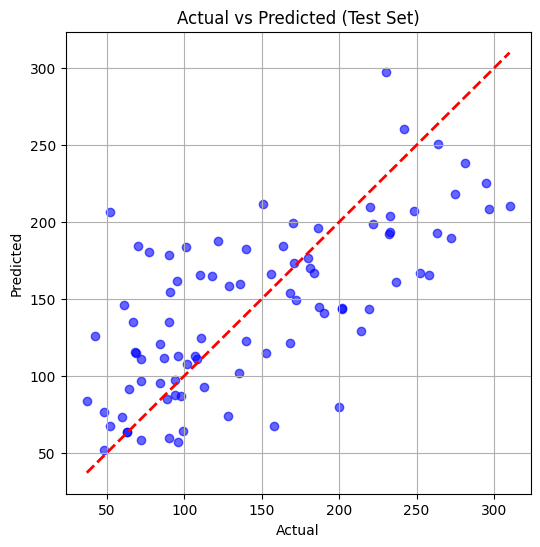

In [69]:
# --- Plot: Actual vs Predicted ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Test Set)")
plt.grid(True)
plt.show()